# Lecture 14: Assignment 2 Discussion

---

1. **Road Maintenance Problem**

    The Chennai Unified Metropolitan Transport Authority (CUMTA) is planning to allocate ₹5,00,000 to maintain two major arterial routes - R1 and R2. Here, R1 has a maintenance cost of ₹50,000 per kilometer, while R2 amounts for ₹30,000 per kilometer for road maintenance. Further, CUMTA plans to finance upkeep of at least 5 kilometers on both the arterial routes to ensure a minimal level of service on the two routes. Based on the formulation developed in the previous assignment, develop figures showcasing,

  - Isocost lines (2)

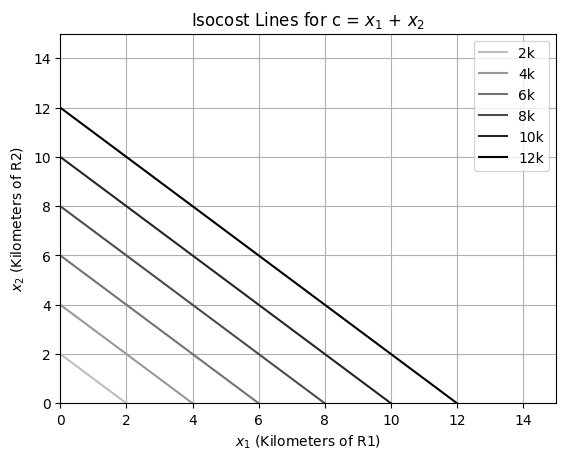

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define objective function parameters
c1, c2 = 1, 1         # Parameters for the objective function c1 * x1 + c2 * x2

# Define the range of x1 values
x1 = np.linspace(0, 100, 200)

# Define set of isocost values (C)
C = [2, 4, 6, 8, 10, 12]  # Adjust these as needed

for i,c in enumerate(C):
  # Calculate x2 value for iscost line c1 * x2 + c2 * x2 = c
  x2 = (c - c1 * x1) / c2
  # Plot the isocost lines
  plt.plot(x1, x2, color=str(0.75 - 0.15 * i), label=f'{c}k')

# Set plot attributes
plt.xlabel(r'$x_1$ (Kilometers of R1)')
plt.ylabel(r'$x_2$ (Kilometers of R2)')
plt.title('Isocost Lines for c = $x_1$ + $x_2$')
plt.legend()
plt.grid(True)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()


  - Feasible region (2)

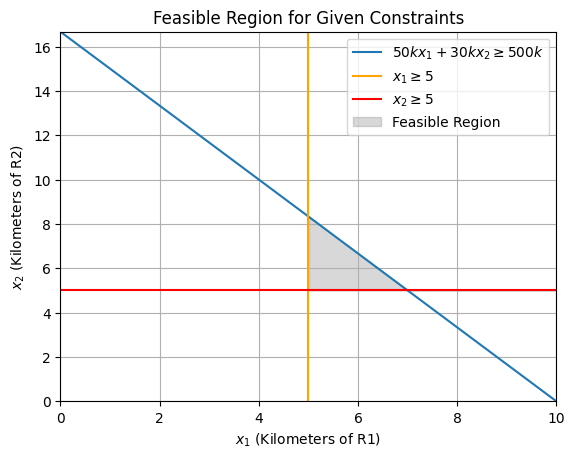

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constraint coefficients
c1, c2 = 1, 1         # Parameters for the objective function c1 * x1 + c2 * x2
a11, a12, b1 = 50000, 30000, 500000   # Coefficients for constraint a11 * x1 + a12 * x2 >= b1
a21, a22, b2 = 1, 0, 5                # Coefficients for constraint a21 * x1 + a22 * x2 >= b2
a31, a32, b3 = 0, 1, 5                # Coefficients for constraint a31 * x1 + a32 * x2 >= b3

# Define the range of x1 values
x1 = np.linspace(0, b1/a11, 400)

# Calculate x2 values for each constraint
x2_1 = (b1 - a11 * x1) / a12  # From a11 * x1 + a12 * x2 >= b1
x2_2 = np.full_like(x1, b2)   # From a21 * x1 + a22 * x2 <= b2
x2_3 = np.full_like(x1, b3)   # From a31 * x1 + a32 * x2 <= b3

# Plot the constraints
plt.plot(x1, x2, label=fr'${a11//1000}kx_1 + {a12//1000}kx_2 \geq {b1//1000}k$')
plt.axvline(x=b2, label=fr'$x_1 \geq {b2}$', color='orange')
plt.axhline(y=b3, label=fr'$x_2 \geq {b3}$', color='red')

# Fill the feasible region
plt.fill_between(x1, x2_3, np.maximum(x2_1, x2_3), where=(x1 >= x2_2), color='grey', alpha=0.3, label="Feasible Region")
                 
# Set plot attributes
plt.xlim(0, max(x1))
plt.ylim(0, max(x2))
plt.xlabel(r'$x_1$ (Kilometers of R1)')
plt.ylabel(r'$x_2$ (Kilometers of R2)')
plt.legend()
plt.title("Feasible Region for Given Constraints")
plt.grid(True)

# Display the figure
plt.show()

- Optimal solution (decision variable and objective function value) (2)

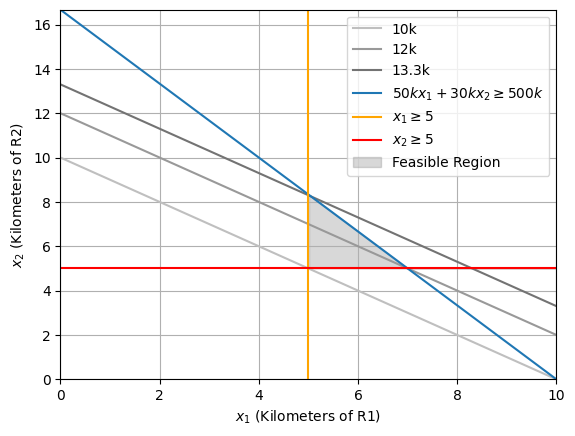

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function parameters and constraint coefficients
a11, a12, b1 = 50000, 30000, 500000   # Coefficients for constraint a11 * x1 + a12 * x2 >= b1
a21, a22, b2 = 1, 0, 5                # Coefficients for constraint a21 * x1 + a22 * x2 >= b2
a31, a32, b3 = 0, 1, 5                # Coefficients for constraint a31 * x1 + a32 * x2 >= b3

# Define the range of x1 values
x1 = np.linspace(0, b1/a11, 400)

# Define set of isocost values (C)
C = [10, 12, 13.3]

for i,c in enumerate(C):
  # Calculate x2 value for iscost line c1 * x2 + c2 * x2 = c
  x2 = (c - c1 * x1) / c2
  # Plot the isocost lines
  plt.plot(x1, x2, color=str(0.75 - 0.15 * i), label=f'{c}k')
  
# Calculate x2 values for each constraint
x2_1 = (b1 - a11 * x1) / a12  # From a11 * x1 + a12 * x2 >= b1
x2_2 = np.full_like(x1, b2)   # From a21 * x1 + a22 * x2 <= b2
x2_3 = np.full_like(x1, b3)   # From a31 * x1 + a32 * x2 <= b3

# Plot the constraints
plt.plot(x1, x2_1, label=fr'${a11//1000}kx_1 + {a12//1000}kx_2 \geq {b1//1000}k$')
plt.axvline(x=b2, label=fr'$x_1 \geq {b2}$', color='orange')
plt.axhline(y=b3, label=fr'$x_2 \geq {b3}$', color='red')

# Fill the feasible region
plt.fill_between(x1, x2_3, np.maximum(x2_1, x2_3), where=(x1 >= x2_2), color='grey', alpha=0.3, label="Feasible Region")
                 
# Set plot attributes
plt.xlim(0, max(x1))
plt.ylim(0, max(x2_1))
plt.xlabel(r'$x_1$ (Kilometers of R1)')
plt.ylabel(r'$x_2$ (Kilometers of R2)')
plt.legend()
plt.grid(True)

# Display the figure
plt.show()

The optimal solution includes 5kms of repair on R1 and 8.34kms of repair on R2.

---

2. **Holiday-Special Train Scheduling Problem**

    The operations team of the Southern Indian Railways wants to schedule holiday-special trains, each with a capacity of 1500 passengers and operational cost of ₹150/km, between Chennai and Hyderabad to cater to the increased passenger demand during the Pongal festival. The surge in passenger demand for the three days prior to the festival is expected to be 10k, 15k, and 12k passengers, respectively. Using the formulation developed in the previous assignment, answer the following questions.

  - Transform the constraints into a system of equations. (2)
    
    Objective:
  
    $$
    \min_{x_1, x_2, x_3} \ Z = 94500(x_1 + x_2 + x_3)
    $$

    Subject to:

    $$
    \begin{aligned}
    & x_1 \geq 6.67 \\
    & x_2 \geq 10 \\
    & x_3 \geq 8 \\
    & x_1, x_2, x_3 \in \mathbb{Z}_+ 
    \end{aligned}
    $$

    Transforming the problem,

    Objective:

    $$
    \min_{x_1, x_2, x_3} \ Z = 94500(x_1 + x_2 + x_3)
    $$

    Subject to:

    $$
    \begin{aligned}
    & x_1 = 6.67 + s_1 \\
    & x_2 = 10 + s_2 \\
    & x_3 = 8 + s_3 \\
    & x_1, x_2, x_3 \in \mathbb{Z}_+ \\
    & s_1, s_2, s_3 \geq 0
    \end{aligned}
    $$

  - Relax the integer constraint of $x_i$'s. (1)

    Objective:

    $$
    \min_{x_1, x_2, x_3} \ Z = 94500(x_1 + x_2 + x_3)
    $$

    Subject to:

    $$
    \begin{aligned}
    & x_1 = 6.67 + s_1 \\
    & x_2 = 10 + s_2 \\
    & x_3 = 8 + s_3 \\
    & x_1, x_2, x_3 \geq 0 \\
    & s_1, s_2, s_3 \geq 0
    \end{aligned}
    $$

  - Find the optimal solution using Simplex method. (5)

    Here, we have a system of 3 equations with 3 decision and 3 slack variables. Hence, we will set 3 variables as non-basic to evaluate the values for the remaining 3 as basic variables, and consequently compute the objective function value.

    | Non-Basic Variables   | Basic Variables | Decision Variable  $\\(x_1, x_2, x_3)$ | Slack Variable $\\(s_1, s_2, s_3)$ | Is Basic Feasible Solution? | Objective Function Value |
    |-----------------------|-----------------|----------------------------------------|------------------------------------|-----------------------------|--------------------------|
    | $x_1, x_2, x_3$       | $s_1, s_2, s_3$ | 0, 0, 0                                | -6.67, -10, -8                     | No                          | -                        |
    | $s_1, x_2, x_3$       | $x_1, s_2, s_3$ | 6.67, 0, 0                             | 0, -10, 8                          | No                          | -                        |
    | $x_1, s_2, x_3$       | $s_1, x_2, s_3$ | 0, 10, 0                               | -6.67, 0, -8                       | No                          | -                        |
    | $x_1, x_2, s_3$       | $s_1, s_2, x_3$ | 0, 0, 8                                | -6.67, -10, 0                      | No                          | -                        |
    | $s_1, s_2, x_3$       | $x_1, x_2, s_3$ | 6.67, 10, 0                            | 0, 0, -8                           | No                          | -                        |
    | $s_1, x_2, s_3$       | $x_1, s_2, x_3$ | 6.67, 0, 8                             | 0, -10, 0                          | No                          | -                        |
    | $x_1, s_2, s_3$       | $s_1, x_2, x_3$ | 0, 10, 8                               | -6.67, 0, 0                        | No                          | -                        |
    | $s_1, s_2, s_3$       | $x_1, x_2, x_3$ | 6.67, 10, 8                            | 0, 0, 0                            | Yes                         | 2.331m                   |

    Hence, the optimal solution necessitates Indian Railways to run 7, 10, and 8 trains to run on the three days prior to the festival, resulting in ₹2.3625m in operational costs.

---

3. **Delhi-Chennai High-Speed Rail Problem**

    The National High Speed Rail Coroporation (NHRC) plans to operate two types of high-speed bullet trains, $\text{T}_1$ and $\text{T}_2$, between Delhi and Chennai, cutting down travel time between two cities from 32 hours to less than 12 hours. Here, $\text{T}_1$ is an executive service train with a capacity of 800 passengers and an operational cost of ₹250/km, stopping at Vijaywada, Nagpur, Bhopal, and Agra on its way from Chennai to Delhi. On the other hand, $\text{T}_2$ is an economy service train with a capacity of 1200 passengers and an operational cost of ₹200/km, having additional stops at Gudur, Balharshah, and Jhansi. To ensure a smooth level of service against an uncertain demand that follows a normal distribution with a mean of 5000 passengers and a standard deviation of 500, and yet maintain operational profitability, NHRC plans to run at most 3 trains daily, for both, executive and economy service. For this problem,

  - Formulate the primal and dual optimisation problem. (4)

    Taking the distance between Delhi and Chennai to be 2180km, 

    ## Primal Problem

    Objective:

    $$
    \min_{x_1, x_2} \ Z = 545000x_1 + 436000x_2
    $$

    Subject to:

    $$
    \begin{aligned}
    & 800x_1 + 1200x_2 \geq 5820 \\
    & x_1 \leq 3 \\
    & x_2 \leq 3 \\
    & x_1, x_2 \in \mathbb{Z}_+ 
    \end{aligned}
    $$

    ## Dual Problem

    Objective:

    $$
    \max_{y_1, y_2, y_3} \ Z = 5820y_1 + -3y_2 + -3y_3
    $$

    Subject to:

    $$
    \begin{aligned}
    & 800y_1 - y_2 \leq 545000 \\
    & 1200y_1 - y_3 \leq 436000 \\
    & y_1, y_2, y_3 \geq 0
    \end{aligned}
    $$

  - With integer constraints relaxed, attach two spreadsheets, one solving the primal optimisation problem and the other solving the dual optimisation problem. (10)

  - Interpret the resulting primal and dual variables. (2)

In [31]:
import numpy as np
from scipy.optimize import linprog

# Cost Parameter
c = [545000, 436000]

# Constraint Parameter (Coefficients)
a = [[800, 1200], [-1, 0], [0, -1]]

# Constraint Parameter (Limits)
b = [5820, -3, -3]

# Domain Constraints
x1_bounds = (0, None)
x2_bounds = (0, None)
bounds = [x1_bounds, x2_bounds]
integrality = [0, 0]  # Relaxed integer constraint

# Solve
result = linprog(np.array(c), A_ub=-np.array(a), b_ub=-np.array(b), bounds=bounds, integrality=integrality, method='highs')
print(f"Optimal number of executive service trains: {round(result.x[0], 3)}, economy service trains: {round(result.x[1], 3)} | Minimum cost: {round(result.fun, 3)} ")

# Dual Domain Constraints
y1_bounds = (0, None)
y2_bounds = (0, None)
y3_bounds = (0, None)
bounds = [y1_bounds, y2_bounds, y3_bounds]
integrality = [0, 0, 0]

# Solve Dual
result = linprog(-np.transpose(b), A_ub=np.transpose(a), b_ub=np.array(c), bounds=bounds, integrality=integrality, method='highs')
print(f"Shadow price for passenger demand: {round(result.x[0], 3)}, executive train fleet size: {round(result.x[1], 3)}, economy train fleet size: {result.x[2]}")

Optimal number of executive service trains: 2.775, economy service trains: 3.0 | Minimum cost: 2820375.0 
Shadow price for passenger demand: 681.25, executive train fleet size: 0.0, economy train fleet size: 381500.0


- With integer constraints relaxed, perform cost senstivity analysis on the primal problem. [Hint: draw the isocost lines and feasible region to answer the following questions]

  - Find the ratio $c_1/c_2 = r$ that renders infinite solutions (1)

    $c_1/c_2 = 800/1200 = 0.667$

  - For $c_1/c_2 < r$, find the optimal solution (2)

    $x_1, x_2 = 3, 2.85$

  - For $c_1/c_2 > r$, find the optimal solution (2)

    $x_1, x_2 = 2.775, 3$